In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time
import warnings

from matplotlib.ticker import MultipleLocator

In [2]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

In [4]:
import sys
sys.path.append('../tools/')
from dust_extinction import calALambda
from data_binning import data_binning

In [5]:
print('NumPy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(mpl.__version__))

NumPy version: 1.21.2
pandas version: 1.3.4
matplotlib version: 3.5.0


In [5]:
#%matplotlib notebook

In [76]:
# SN metadata

z = 0.0307
t_max = 2458986.91
t_max_mjd = t_max - 2400000.5
ebv = 0.404
rv = 3.1

tfl = 58972.46296299994

In [7]:
def plot_box_spec(wave, flux):
    flux_plot = np.repeat(flux, 2)
    wv_plot = wave.copy()
    wv_plot[:-1] += np.diff(wave) / 2
    wv_plot = np.append(
        wave[0] - (wave[1] - wave[0]) / 2,
        np.append(np.repeat(wv_plot[0:-1], 2),
                  wave[-1] + (wave[-1] - wave[-2]) / 2))

    return wv_plot, flux_plot

In [8]:
spec_files = glob.glob('./ZTF20aayhacx*ascii')
spec_files.sort()

In [9]:
spec_files

['./ZTF20aayhacx_20200507_P60_v2.ascii',
 './ZTF20aayhacx_20200513_NOT_v4.ascii',
 './ZTF20aayhacx_20200521_P60_v2.ascii',
 './ZTF20aayhacx_20200528_P60_v2.ascii',
 './ZTF20aayhacx_20200529_Lick_3-m_v1.ascii',
 './ZTF20aayhacx_20200608_P60_v2.ascii',
 './ZTF20aayhacx_20200609_GNIRS.ascii',
 './ZTF20aayhacx_20200610_P200_v2.ascii',
 './ZTF20aayhacx_20200623_Keck1_v1.ascii',
 './ZTF20aayhacx_20200915_Keck1_v2.ascii',
 './ZTF20aayhacx_20201020_Keck1_v1.ascii']

In [10]:
spec_df = pd.read_csv(spec_files[1],
                      comment='#',
                      delim_whitespace=True,
                      header=None)
wv, fl, fl_unc = spec_df[0].values, spec_df[1].values, spec_df[2].values
wv /= (1 + z)
fl *= 10**(0.4 * calALambda(wv, rv, ebv))
fl_unc *= 10**(0.4 * calALambda(wv, rv, ebv))
np.savetxt('ZTF20aayhacx_20200513_NOT_v4_corrected.dat',
           np.array([wv, fl, fl_unc]).T,
           fmt='%.5f')

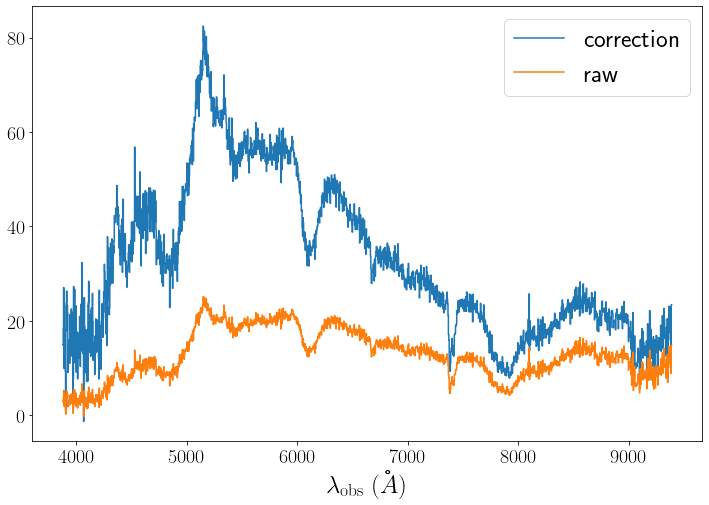

In [11]:
spec_df = pd.read_csv(spec_files[1],
                      comment='#',
                      delim_whitespace=True,
                      header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
fl_unc = np.repeat(spec_df[1].values, 2)
plt.figure(figsize=(12, 8))
plt.errorbar(wv / (1 + z),
             fl * 10**(0.4 * calALambda(wv, rv, ebv)),
             label='correction')
plt.errorbar(wv / (1 + z), fl, label='raw')
#plt.ylim(0, 30)
#plt.xlim(7500, 8250)
plt.xlabel(r'$\lambda_\mathrm{obs} \; (\AA)$')
plt.legend()
plt.show()

Try the observation date.
Try the observation date.


/Users/chang/Desktop/SNIa/SN2020jgb/spectroscopy/../tools/data_binning.py:20: RuntimeWarning: Mean of empty slice.
  date_bin = temp[arg, 0].mean()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chang/Desktop/SNIa/SN2020jgb/spectroscopy/../tools/data_binning.py:22: RuntimeWarning: Mean of empty slice.
  (temp[arg, 2]**(-2)).mean()
/Users/chang/Desktop/SNIa/SN2020jgb/spectroscopy/../tools/data_binning.py:23: RuntimeWarning: Mean of empty slice.
  mag_bin = weight_mag.mean()
/Users/chang/Desktop/SNIa/SN2020jgb/spectroscopy/../tools/data_binning.py:24: RuntimeWarning: Mean of empty slice.
  magerr_bin = (1 / (data[arg, 2]**(-2)).mean() /
/Users/chang/Desktop/SNIa/SN2020jgb/spectroscopy/../tools/data_binning.py:20: RuntimeWarning: Mean of empty slice.
  date_bin = temp[arg, 0].mean()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWar

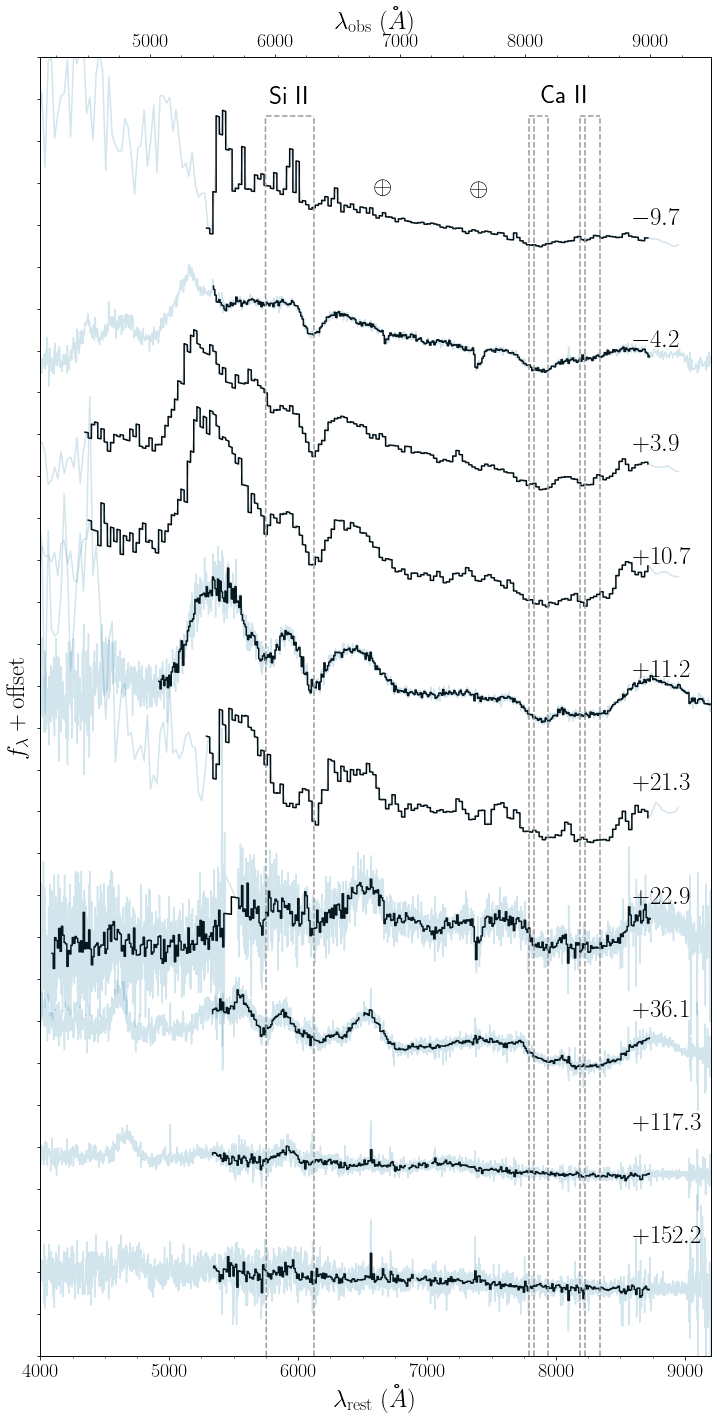

In [131]:
aam_colors = {
    'mustard': "#E29930",
    'blue': "#217CA3",
    'asphalt': "#32384D",
    'navy': "#444C5C",
    'punch': "#CE5A57",
    'ocean': "#78A5A3",
    'warm': "#E1B16A",
}

phase_list = []
mjd_list = []

fig, ax = plt.subplots(figsize=(10, 20))
spec_num = -1
for spec in spec_files:
    if 'GNIRS' in spec:
        continue
    spec_num += 1
    spec_df = pd.read_csv(spec,
                          comment='#',
                          delim_whitespace=True,
                          header=None)

    try:
        if 'Keck' in spec:
            fl_unc = spec_df[3].values
        else:
            fl_unc = spec_df[2].values

            if 'P60' in spec or 'P200' in spec:
                fl_unc **= .5
    except:
        warnings.warn("No flux uncertainty in the datafile!")
        # set relative uncertainty to be 10%
        fl_unc = np.ones_like(spec_df[0].values) * 1e-1 * np.median(
            spec_df[0].values)

    out = data_binning(np.array([spec_df[0].values, spec_df[1].values,
                                 fl_unc]).T,
                       size=10)

    wv, fl = plot_box_spec(out[:, 0], out[:, 1])

    fl_unc = np.repeat(out[:, -1], 2)
    arg1 = np.argwhere(wv < 5500).flatten()
    arg2 = np.argwhere(fl[arg1] < fl_unc[arg1] * 3).flatten()
    if len(arg2) == 0:
        ind = arg1[-1]
    else:
        ind = arg1[arg2[-1]]
    fl = fl[ind + 1:]
    wv = wv[ind + 1:]
    fl_unc = fl_unc[ind + 1:]
    arg1 = np.argwhere(wv > 9000).flatten()
    arg2 = np.argwhere(fl[arg1] < fl_unc[arg1] * 3).flatten()
    try:
        fl = fl[:arg1[arg2][0]]
        wv = wv[:arg1[arg2][0]]
        fl_unc = fl_unc[:arg1[arg2][0]]
    except:
        fl = fl[wv < 9000]
        fl_unc = fl_unc[wv < 9000]
        wv = wv[wv < 9000]

        wv = wv[fl > fl_unc]
        fl = fl[fl > fl_unc]
    fl *= 10**(0.4 * calALambda(wv, rv, ebv))

    norm_flux = np.nanmedian(fl[np.where((wv > 7200) & (wv < 7400))])
    ax.plot(wv / (1 + z), fl / norm_flux - 2.8 * spec_num, color='k')
    ax.plot(spec_df[0].values / (1 + z),
            spec_df[1].values *
            10**(0.4 * calALambda(spec_df[0].values, rv, ebv)) / norm_flux -
            2.8 * spec_num,
            color=aam_colors['blue'],
            alpha=0.2)

    with open(spec) as f:
        ll = f.readlines()
    # brute force
    mjd_found = False
    for l in ll:
        if 'MJD' in l:
            mjd_found = True
            if '=' in l and 'at start' in l:
                mjd_obs = float(l.split('=')[1].split("'")[1])
            elif '=' in l and '/' in l:
                mjd_obs = float(l.split('=')[1].split('/')[0])
            elif '=' in l:
                mjd_obs = float(l.split('=')[1])
            elif ':' in l:
                mjd_obs = float(l.split(':')[1])
            break
    if not mjd_found:
        print('Warning: MJD-obs not found in {}!'.format(spec))
        print('Try the observation date.')
        year = 2020
        pos_dat = spec.find(str(year))
        year_obs = spec[pos_dat:pos_dat + 4]
        mon_obs = spec[pos_dat + 4:pos_dat + 6]
        date_obs = spec[pos_dat + 6:pos_dat + 8]
        mjd_obs = Time('{}-{}-{}'.format(year_obs, mon_obs, date_obs)).mjd

    phase = (mjd_obs - t_max_mjd) / (1 + z)
    phase_list.append(phase)
    mjd_list.append(mjd_obs)
    if mjd_obs < t_max_mjd:
        ax.text(8600, 1 - 2.9 * spec_num, r'$-{:.1f}$'.format(np.abs(phase)))
    else:
        ax.text(8600, 1 - 2.7 * spec_num, r'$+{:.1f}$'.format(np.abs(phase)))

ax.set_xlim(4000, 9200)
ax.set_ylim(-26, 5)
ax.set_yticklabels([])
ax.set_ylabel(r'$f_\lambda + \mathrm{offset}$')
ax.set_xlabel(r'$\lambda_\mathrm{rest} \;  (\AA)$')
ax.xaxis.set_minor_locator(MultipleLocator(250))
ax.yaxis.set_major_locator(MultipleLocator(1))

wv_obs = ax.twiny()
wv_obs.set_xlim(np.array(ax.get_xlim()) * (1 + z))
wv_obs.set_xlabel(r'$\lambda_\mathrm{obs} \; (\AA)$')
wv_obs.xaxis.set_minor_locator(MultipleLocator(250))

# plot lines
# Si II 6355
ax.plot([6355 * (1 - 11000 / 2.9979e5), 6355 * (1 - 11000 / 2.9979e5)],
        [-26, 3.6],
        '--',
        color='0.6')
# Si II 5972
ax.plot([5972 * (1 - 11000 / 2.9979e5), 5965 * (1 - 11000 / 2.9979e5)],
        [-26, 3.6],
        '--',
        color='0.6')
# # Si II 5669
# ax.plot([5669*(1-19000/2.9979e5), *5670*(1-18000/2.9979e5)],
#         [-1.5,3.6], '--', color='0.6')
# # Si II 5047
# ax.plot([5047*(1-19000/2.9979e5), *5047*(1-18000/2.9979e5)],
#         [-1.6,3.6], '--', color='0.6')
ax.plot([5972 * (1 - 11000 / 2.9979e5), 6355 * (1 - 11000 / 2.9979e5)],
        [3.6, 3.6],
        '--',
        color='0.6')
ax.text(5937.346, 3.9, r'Si II', ha='center')

# Ca II 8498 - HV
ax.plot([8498 * (1 - 25000 / 2.9979e5), 8498 * (1 - 25000 / 2.9979e5)],
        [-26, 3.6],
        '--',
        color='0.6')
# Ca II 8542 - HV
ax.plot([8542 * (1 - 25000 / 2.9979e5), 8542 * (1 - 25000 / 2.9979e5)],
        [-26, 3.6],
        '--',
        color='0.6')
# Ca II 8662 - HV
ax.plot([8662 * (1 - 25000 / 2.9979e5), 8662 * (1 - 25000 / 2.9979e5)],
        [-26, 3.6],
        '--',
        color='0.6')
ax.plot([8498 * (1 - 25000 / 2.9979e5), 8662 * (1 - 25000 / 2.9979e5)],
        [3.6, 3.6],
        '--',
        color='0.6')

# Ca II 8498
ax.plot([8498 * (1 - 11000 / 2.9979e5), 8498 * (1 - 11000 / 2.9979e5)],
        [-26, 3.6],
        '--',
        color='0.6')
# Ca II 8542
ax.plot([8542 * (1 - 11000 / 2.9979e5), 8542 * (1 - 11000 / 2.9979e5)],
        [-26, 3.6],
        '--',
        color='0.6')
# Ca II 8662
ax.plot([8662 * (1 - 11000 / 2.9979e5), 8662 * (1 - 11000 / 2.9979e5)],
        [-26, 3.6],
        '--',
        color='0.6')
ax.plot([8498 * (1 - 11000 / 2.9979e5), 8662 * (1 - 11000 / 2.9979e5)],
        [3.6, 3.6],
        '--',
        color='0.6')
ax.text(8070, 3.9, r'Ca II', ha='center')

ax.text(7633 / (1 + z), 1.7, r'$\oplus$', ha='center')
ax.text(6867 / (1 + z), 1.75, r'$\oplus$', ha='center')

fig.subplots_adjust(left=0.06, bottom=0.051, top=0.953, right=0.991)
#fig.savefig('../paper/figures/optical_spec_evolution.pdf')

# Line Velocity

In [13]:
date_list = (np.array(mjd_list)-t_max_mjd) / (1 + z)

In [22]:
SiII_vel = np.array([
    np.nan, -11722, -11329, -11391, -11248, -10730, np.nan, np.nan,
    np.nan, np.nan
])
SiII_vel_sig = np.array(
    [np.nan, 75, 76, 195, 73, 233, np.nan, np.nan, np.nan, np.nan])

CaII_vel_pvf = np.array([
    np.nan, -11092, -9615, -8467, -8788, -8844, -9488, -9514, np.nan,
    np.nan
])
CaII_vel_pvf_sig = np.array(
    [640, 218, 217, 390, 230, 615, 546, 177, np.nan, np.nan])

CaII_vel_hvf = np.array([
    -24713, -24536, -24578, -23608, -24374, -23814, -23251, -23256,
    np.nan, np.nan
])
CaII_vel_hvf_sig = np.array(
    [421, 88, 320, 588, 149, 747, 550, 179, np.nan, np.nan])

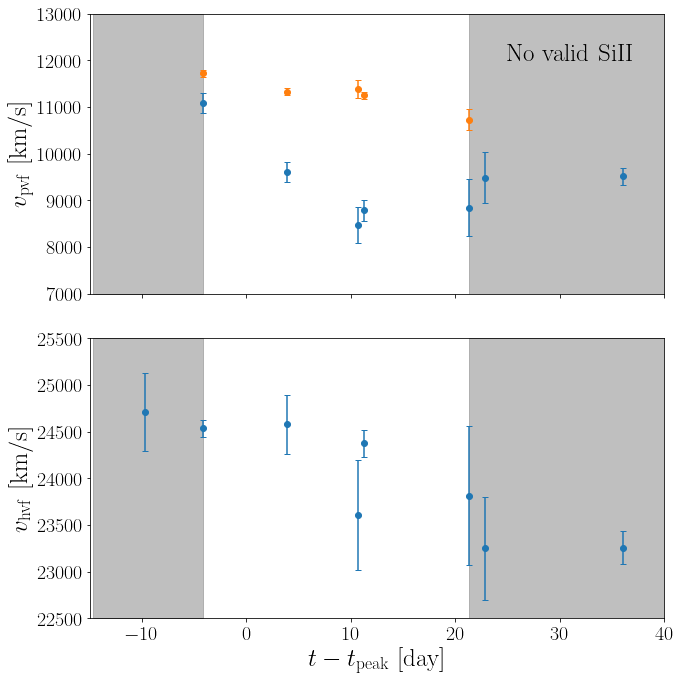

In [23]:
f, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ylim1 = [7000, 13000]
ylim2 = [22500, 25500]

ax[0].errorbar(date_list,
               -CaII_vel_pvf,
               yerr=CaII_vel_pvf_sig,
               fmt='o',
               capsize=3)
ax[0].errorbar(date_list, -SiII_vel, yerr=SiII_vel_sig, fmt='o', capsize=3)

ax[1].errorbar(date_list,
               -CaII_vel_hvf,
               yerr=CaII_vel_hvf_sig,
               fmt='o',
               capsize=3)
for a, ylim in zip(ax, [ylim1, ylim2]):
    a.fill_betweenx(ylim, [date_list[5], date_list[5]],
                    [date_list[-1], date_list[-1]],
                    color='grey',
                    alpha=0.5)
    a.fill_betweenx(ylim, [date_list[0] - 5, date_list[0] - 5],
                    [date_list[1], date_list[1]],
                    color='grey',
                    alpha=0.5)
ax[0].set_ylabel(r'$v_\mathrm{pvf}\ [\mathrm{km/s}]$')
ax[1].set_ylabel(r'$v_\mathrm{hvf}\ [\mathrm{km/s}]$')
ax[1].set_xlabel(r'$t-t_\mathrm{peak}\ [\mathrm{day}]$')
ax[0].set_ylim(ylim1)
ax[1].set_ylim(ylim2)
ax[1].set_xlim(-15, 40)
ax[0].text(25, 12000, r'$\mathrm{No\ valid\ SiII}$')
plt.tight_layout()

# ZTF Magnitude

In [34]:
filter_g = np.loadtxt('../lc/response/Palomar_ZTF.g.dat')
filter_r = np.loadtxt('../lc/response/Palomar_ZTF.r.dat')

In [62]:
def filter_band(filt, wv):
    wv_range = filt[:, 0]
    response = filt[:, 1]
    if wv < wv_range[0] or wv > wv_range[-1]:
        return 0
    arg = np.argwhere(wv_range >= wv).flatten()[0]
    try:
        slope = (response[arg] - response[arg - 1]) / (wv_range[arg] - wv_range[arg - 1])
        return slope * (wv - wv_range[arg]) + response[arg]
    except:
        print(wv_range[arg], response[arg])
        return np.nan

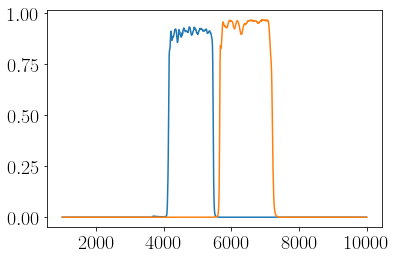

In [102]:
wv = np.linspace(1000, 10000, 1000)
res = [filter_band(filter_g, w) for w in wv]
plt.plot(wv, res)
res = [filter_band(filter_r, w) for w in wv]
plt.plot(wv, res)

In [106]:
def integrate(y, x):
    s = 0
    ds0 = 0
    for i in range(len(x)-1):
        ds = (x[i + 1] - x[i]) * (y[i + 1] + y[i]) / 2
        if np.isnan(ds):
            ds = ds0
        s += ds
        ds0 = ds
    return s

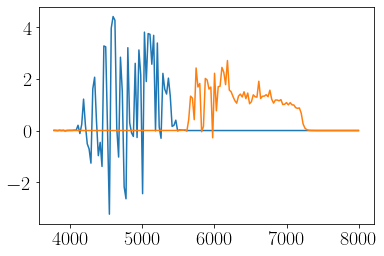

./ZTF20aayhacx_20200507_P60_v2.ascii 3.9541314002126455 0.253030283718749


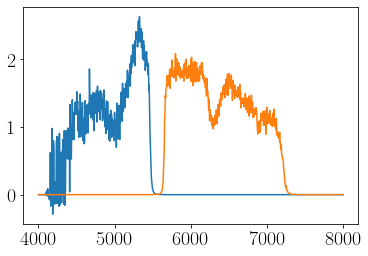

./ZTF20aayhacx_20200513_NOT_v4.ascii 9.659343574130617 0.36887159880160786


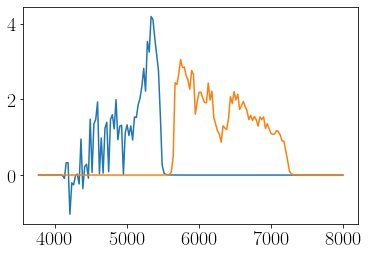

./ZTF20aayhacx_20200521_P60_v2.ascii 17.96759600006044 0.5074784739123119


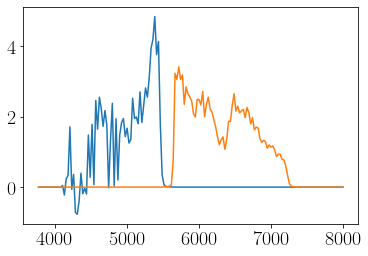

./ZTF20aayhacx_20200528_P60_v2.ascii 24.978201800033276 0.38694410951340374


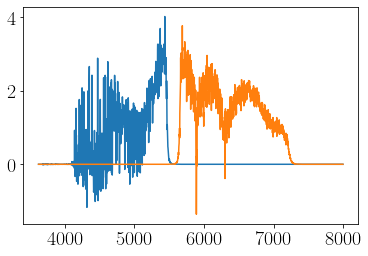

./ZTF20aayhacx_20200529_Lick_3-m_v1.ascii 25.53703700006008 0.6879180606442397


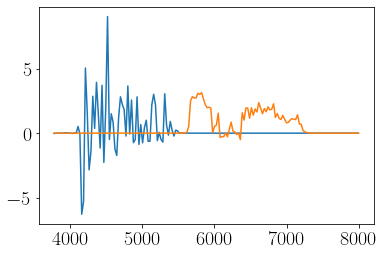

/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_27809/632896152.py:61: RuntimeWarning: invalid value encountered in log10
  g_r = -2.5 * np.log10(gFlux / rFlux)


./ZTF20aayhacx_20200608_P60_v2.ascii 35.94684230023995 1.219398001127705


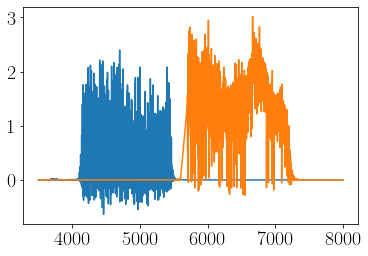

./ZTF20aayhacx_20200610_P200_v2.ascii 37.53703700006008 1.3673837121563182


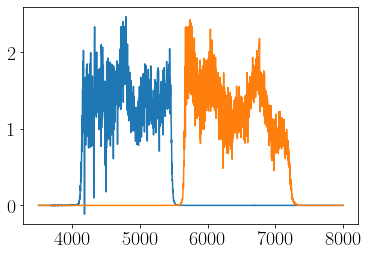

./ZTF20aayhacx_20200623_Keck1_v1.ascii 51.1208970000589 0.11303648001819319


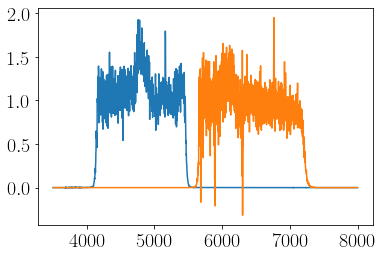

./ZTF20aayhacx_20200915_Keck1_v2.ascii 134.82515700005752 0.039180044833107275


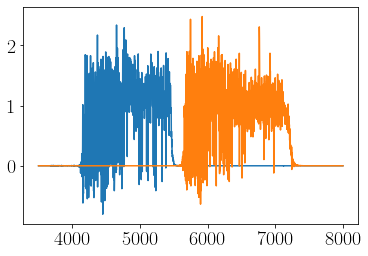

./ZTF20aayhacx_20201020_Keck1_v1.ascii 170.79518600006122 0.25962339110779126


In [141]:
from astropy.stats import mad_std

t, gr, gr_unc = [], [], []

spec_num = -1
for spec in spec_files:
    if 'GNIRS' in spec:
        continue
    spec_num += 1
    spec_df = pd.read_csv(spec,
                          comment='#',
                          delim_whitespace=True,
                          header=None)

    try:
        if 'Keck' in spec:
            fl_unc = spec_df[3].values
        else:
            fl_unc = spec_df[2].values

            if 'P60' in spec or 'P200' in spec:
                fl_unc **= .5
    except:
        continue
        '''warnings.warn("No flux uncertainty in the datafile!")
        # set relative uncertainty to be 10%
        fl_unc = np.ones_like(spec_df[0].values) * 1e-1 * np.median(
            spec_df[0].values)'''

    wv = spec_df[0].values
    fl = spec_df[1].values
    arg = np.where((wv < 8000) & (wv > 3500))
    fl = fl[arg]
    fl_unc = fl_unc[arg]
    wv = wv[arg]
    fl[fl <= 4 * fl_unc] = 0
    
    fl *= 10**(0.4 * calALambda(wv, rv, ebv))
    fl_unc *= 10**(0.4 * calALambda(wv, rv, ebv))
    norm_flux = np.nanmedian(fl[np.where((wv > 7200) & (wv < 7400))])

    gFlux, rFlux = [], []
    for i in range(500):
        gband = (fl + fl_unc * np.random.randn(len(fl))) * np.array(
            [filter_band(filt=filter_g, wv=w) for w in wv]) / norm_flux
        rband = (fl + fl_unc * np.random.randn(len(fl))) * np.array(
            [filter_band(filt=filter_r, wv=w) for w in wv]) / norm_flux
        #plt.plot(wv, gband, color='darkgreen')
        #plt.plot(wv, rband, color='crimson')
        gflux = integrate(gband, wv)
        rflux = integrate(rband, wv)
        gFlux = np.append(gFlux, gflux)
        rFlux = np.append(rFlux, rflux)
        #plt.show()
        #break
    plt.plot(wv, gband)
    plt.plot(wv, rband)
    plt.show()
    #plt.hist(gFlux, bins=20, histtype='step')
    #plt.hist(rFlux, bins=20, histtype='step')
    g_r = -2.5 * np.log10(gFlux / rFlux)
    #plt.hist(g_r, histtype='step', bins=50)
    #plt.show()
    t = np.append(t, mjd_list[spec_num] - tfl)
    gr = np.append(gr, np.mean(g_r))
    gr_unc = np.append(gr_unc, mad_std(g_r))

    print(spec, mjd_list[spec_num] - tfl,
          -2.5 * np.log10(np.mean(gFlux) / np.mean(rFlux)))

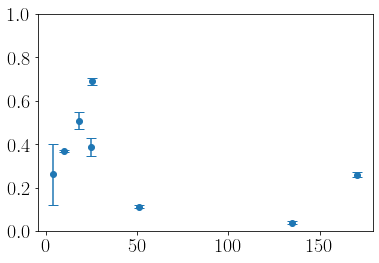

In [142]:
plt.errorbar(t, gr, yerr=gr_unc, fmt='o', capsize=5)
plt.ylim(0, 1)
np.savetxt('spec_gr.txt', np.array([t, gr, gr_unc]).T, fmt='%.5f')